In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

# Importing dataset

In [2]:
dataset = pd.read_csv('diabetes_data.csv') 
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Checking the missing values 

In [3]:
dataset.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

# Encoding the categorical independent features

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
dataset_new=dataset.copy()
label_encoder=LabelEncoder()
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
dataset_new["Gender"]=label_encoder.fit_transform(dataset_new["Gender"])
dataset_new["Polyuria"]=label_encoder.fit_transform(dataset_new["Polyuria"])
dataset_new["Polydipsia"]=label_encoder.fit_transform(dataset_new["Polydipsia"])
dataset_new["sudden weight loss"]=label_encoder.fit_transform(dataset_new["sudden weight loss"])
dataset_new["weakness"]=label_encoder.fit_transform(dataset_new["weakness"])
dataset_new["Polyphagia"]=label_encoder.fit_transform(dataset_new["Polyphagia"])
dataset_new["Genital thrush"]=label_encoder.fit_transform(dataset_new["Genital thrush"])
dataset_new["visual blurring"]=label_encoder.fit_transform(dataset_new["visual blurring"])
dataset_new["Itching"]=label_encoder.fit_transform(dataset_new["Itching"])
dataset_new["Irritability"]=label_encoder.fit_transform(dataset_new["Irritability"])
dataset_new["delayed healing"]=label_encoder.fit_transform(dataset_new["delayed healing"])
dataset_new["partial paresis"]=label_encoder.fit_transform(dataset_new["partial paresis"])
dataset_new["muscle stiffness"]=label_encoder.fit_transform(dataset_new["muscle stiffness"])
dataset_new["Alopecia"]=label_encoder.fit_transform(dataset_new["Alopecia"])
dataset_new["Obesity"]=label_encoder.fit_transform(dataset_new["Obesity"])
dataset_new["class"]=label_encoder.fit_transform(dataset_new["class"])
#X = np.array(ct.fit_transform(X))
dataset_new.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [5]:
dataset_new.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [6]:
categorical_feature_columns = list(set(dataset_new.columns) - set(dataset_new._get_numeric_data().columns))
categorical_feature_columns

[]

In [7]:
numerical_feature_columns = list(dataset_new._get_numeric_data().columns)
numerical_feature_columns

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class']

In [8]:
target = 'class'

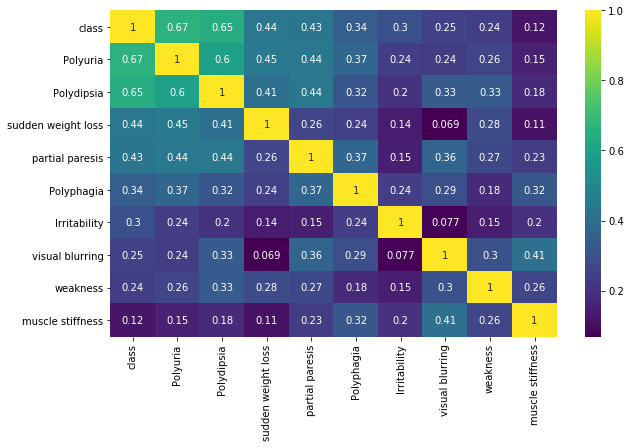

In [9]:
k = 10 #number of variables for heatmap
cols = dataset_new[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = dataset_new[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [10]:
X = dataset_new.iloc[:, :-1].values
Y = dataset_new.iloc[:, -1].values

In [11]:
X.shape

(520, 16)

In [12]:
Y.shape

(520,)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=0)
print(y_test)

[1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1
 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0
 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0]


In [14]:
from sklearn.naive_bayes import GaussianNB
classifier = LogisticRegression()
lr_baseline_model=classifier.fit(x_train, y_train)

In [15]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       pd.Series(y['Outcome'],name='Actual')))
    return 1

In [30]:
generate_accuracy_and_heatmap(lr_baseline_model, x_test, y_test)

Accuracy is:  0.936046511627907
F1 score is:  0.948356807511737




IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Splitting the Features and Labels

In [31]:
X = dataset_new.iloc[:, :-1]
Y = dataset_new.iloc[:, -1] 

# apply SelectKBest class to extract top 10 best features

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)
print(fit)

SelectKBest(k=5, score_func=<function chi2 at 0x000001AB8B782318>)


In [33]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [34]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,Age,18.845767
1,Gender,38.747637
2,Polyuria,116.184593
3,Polydipsia,120.785515
4,sudden weight loss,57.749309
5,weakness,12.724262
6,Polyphagia,33.198418
7,Genital thrush,4.914009
8,visual blurring,18.124571
9,Itching,0.047826


In [35]:
print(featureScores.nlargest(7,'Score'))  #print 10 best features

                 Specs       Score
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden weight loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           Polyphagia   33.198418


In [36]:
x_train_chi=bestfeatures.transform(x_train)
x_test_chi=bestfeatures.transform(x_test)

In [37]:
x_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [38]:
x_train_chi[0:2]

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1]], dtype=int64)

In [39]:
from sklearn.linear_model import LogisticRegression
import time
start = time.time()
clf_lr = LogisticRegression() 
lr_baseline_model=clf_lr.fit(x_train_chi,y_train)
y_pred=clf_lr.predict(x_test_chi)
end = time.time()
print(end-start)

0.015277385711669922


In [40]:
generate_accuracy_and_heatmap(lr_baseline_model, x_test_chi, y_test)

Accuracy is:  0.8953488372093024
F1 score is:  0.9174311926605505




IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [41]:
confusion_matrix(y_test,y_pred)

array([[ 54,  12],
       [  6, 100]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

NameError: name 'y_pred' is not defined

In [20]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
clf = KNeighborsClassifier()
baseline_model=clf.fit(x_train_chi,y_train)
y_pred=clf.predict(x_test_chi)
end = time.time()
print(end-start)

NameError: name 'time' is not defined

In [21]:
generate_accuracy_and_heatmap(baseline_model, x_test_chi, y_test)

NameError: name 'baseline_model' is not defined

In [22]:
confusion_matrix(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [23]:
from sklearn.naive_bayes import GaussianNB
start = time.time()
classifier = GaussianNB()
classifier.fit(x_train_chi, y_train)
y_pred = classifier.predict(x_test_chi)
end = time.time()
print(end-start)

NameError: name 'time' is not defined

In [24]:
generate_accuracy_and_heatmap(baseline_model, x_test_chi, y_test)

NameError: name 'baseline_model' is not defined

In [25]:
confusion_matrix(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [26]:
from sklearn.svm import SVC
start = time.time()
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train_chi, y_train)
y_pred = classifier.predict(x_test_chi)
end = time.time()
print(end-start)

NameError: name 'time' is not defined

In [27]:
generate_accuracy_and_heatmap(baseline_model, x_test_chi, y_test)

NameError: name 'baseline_model' is not defined

In [28]:
confusion_matrix(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [29]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train_chi, y_train)
y_pred = classifier.predict(x_test_chi)
end = time.time()
print(end-start)

NameError: name 'time' is not defined

In [ ]:
generate_accuracy_and_heatmap(baseline_model, x_test_chi, y_test)